Division of groups withing a DataSet:
  - Maximize the similarity intragroup while maximizing dissimilarity inter-groups
  
Two applications:
  - Market segmentation
  - Image segmentation
  
Difference between clasification and clustering:
  - Clasification is logistic regression in machine learning terms, we have labels (supervised learning, we know the groups in which we can classify data)
  - In Clustering we do not have labels (unsupervised learning) we cluster the data in different groups be we do not know if these clusters are: the right number, correct at all or useful whatsoever. Moreover, the output we get is soething we must name ourselves.
  - Classification is predicting an output category given input data
  - Clustering is grouping data points together based on similarities among them and differences from others.
  
Two Math pre-requisites:

  - Know how to measure the distance between two data points (euclidean distance)
  
  - Define the term "Centroid": Mean position of a group of points
  
### K.Means clustering:
    - First we choose the number of clusters (K)
    - The we choose the starting centroids(seeds), at random or based on previous data
    - Assign each point of data to a seed (by proximity in the graph)
    - Then we adjust the centroids to be in the center of their respective clusters
    - reassing any points that are now closer to a centroid that it was not the initial one, recalculate the centroid and repeat untill all is well adjusted

In [21]:
# Import relevant libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.cluster import KMeans

In [22]:
#Load the data:

# data = pd.read_csv('D:/DOCUMENTOS/Programacion/DS_BootCamp_Udemy/Resources/3.01. Country clusters.csv')
data = pd.read_csv('C:/Users/albert.garcia/coding_projects_ag/Other_coding_resources/3.01. Country clusters.csv')
data

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Australia,-25.45,133.11,English


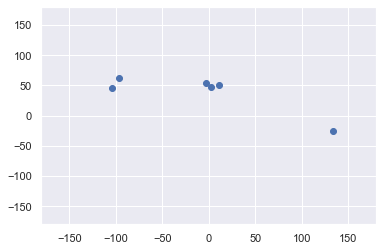

In [23]:
# Plot the data:
plt.scatter(data['Longitude'], data['Latitude'])
plt.xlim(-180,180)
plt.ylim(-180,180)
plt.show()

In [24]:
# Select the features
x = data.iloc[:,1:3] # First argument: row indices, Second argument: column indeces
x

,Latitude,Longitude
0,44.97,-103.77
1,62.40,-96.80
2,46.75,2.40
3,54.01,-2.53
4,51.15,10.40
5,-25.45,133.11


In [25]:
# Clustering
kmeans = KMeans(3) # The num in brackets is the num of clusters we want. now kmeans is a KMeans object

In [26]:
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [27]:
# Clustering results
identified_clusters = kmeans.fit_predict(x)
identified_clusters # Five obs in the first cluster (0), and one in the second cluster (2)

array([2, 2, 1, 1, 1, 0])

In [28]:
data_with_clusters = data.copy()
data_with_clusters['Cluster'] = identified_clusters
data_with_clusters

,Country,Latitude,Longitude,Language,Cluster
0,USA,44.97,-103.77,English,2
1,Canada,62.40,-96.80,English,2
2,France,46.75,2.40,French,1
3,UK,54.01,-2.53,English,1
4,Germany,51.15,10.40,German,1
5,Australia,-25.45,133.11,English,0


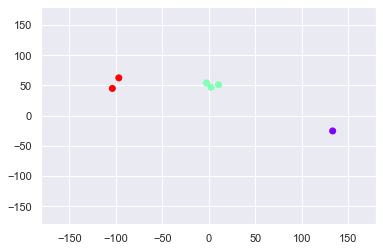

In [29]:
plt.scatter(data_with_clusters['Longitude'], data_with_clusters['Latitude'], c=data_with_clusters['Cluster'], cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-180,180)
plt.show()

#### Clustering categorical data:

Map language data:

In [12]:
data_mapped = data.copy()
data_mapped['Language'] = data_mapped['Language'].map({'English':0, 'French':1, 'German':2})
data_mapped

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,0
1,Canada,62.40,-96.80,0
2,France,46.75,2.40,1
3,UK,54.01,-2.53,0
4,Germany,51.15,10.40,2
5,Australia,-25.45,133.11,0


In [13]:
# Feature selection:
x = data_mapped.iloc[:,1:4]

In [14]:
x

,Latitude,Longitude,Language
0,44.97,-103.77,0
1,62.40,-96.80,0
2,46.75,2.40,1
3,54.01,-2.53,0
4,51.15,10.40,2
5,-25.45,133.11,0


In [15]:
# Clustering
kmeans_2 = KMeans(2)
kmeans_2.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [16]:
#Clustering results
ident_clusters = kmeans_2.fit_predict(x)
ident_clusters

array([1, 1, 1, 1, 1, 0])

In [17]:
data_w_clusters = data_mapped.copy()
data_w_clusters['Cluster'] = ident_clusters
data_w_clusters

,Country,Latitude,Longitude,Language,Cluster
0,USA,44.97,-103.77,0,1
1,Canada,62.40,-96.80,0,1
2,France,46.75,2.40,1,1
3,UK,54.01,-2.53,0,1
4,Germany,51.15,10.40,2,1
5,Australia,-25.45,133.11,0,0


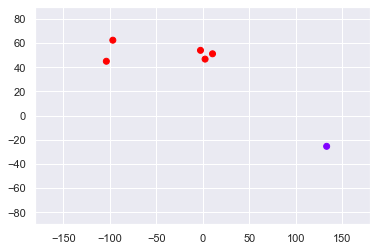

In [18]:
plt.scatter(data_w_clusters['Longitude'], data_w_clusters['Latitude'], c=data_w_clusters['Cluster'], cmap='rainbow')
plt.xlim(-180, 180)
plt.ylim(-90,90)
plt.show()

### Criterion to select num of clusters:

1.- Elbow Method
    - For K-Means, minimizing intracluster distance implies maximizing intercluster distance
    Within cluster sum of squares WCSS. If we minimize WCSS, me have reached perfect clustering solution. We want WCSS to be as low as possible while having a small group of clusters we can interpret. 
    - If we plot WCSS vs nº of clusters we reach a point which, from there on, WCSS is 0. We want that point
    
 ### WCSS

In [19]:
kmeans_2.inertia_ # This gives us the WCSS for the num of clusters of kmeans_2

13208.95812

In [31]:
wcss = []

for i in range(1,7):
    kmeans_3 = KMeans(i)
    kmeans_3.fit(x)
    wcss_iter = kmeans_3.inertia_
    wcss.append(wcss_iter)

In [32]:
wcss

[42601.91356666667,
 13205.758119999999,
 288.1052333333333,
 111.91233333333332,
 38.50624999999998,
 0.0]

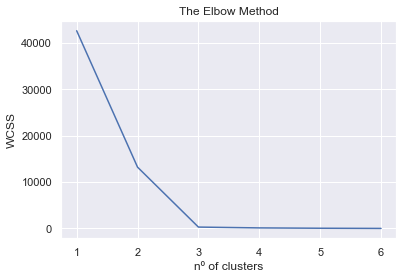

In [33]:
# Elbow Method
number_clusters = range(1,7)
plt.plot(number_clusters,wcss)
plt.title('The Elbow Method')
plt.xlabel('nº of clusters')
plt.ylabel('WCSS')
plt.show()

### To Standartize or not to Standartize:

    - When we don't standardize, the range of the values (difference between max and min values) serve as weights of each variable
    - After standardizing all variables, all of them have the same weight.
    - If you already know that some variable is mor important than others, it is better not to standarize as standartizacion puts all variables on equal footing.


### Clusters vs regression:

    - Clustering can be used to analize data prior to a regression and look for possible ommited variable bias, as you may find that some variables are good for grouping data